In [34]:
# Imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
# Visulization
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Algorithms
from sklearn.linear_model import LogisticRegression # LR
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.naive_bayes import BernoulliNB # NB
from sklearn import svm # SVM
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # RF

In [4]:
dataset = pd.read_csv("urldata.csv") # accessing dataset

In [35]:
dataset # view db

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [36]:
dataset.shape # view count of db

(420464, 2)

In [38]:
dataset["label"].value_counts() # count good and bad labels

label
good    344821
bad      75643
Name: count, dtype: int64

In [37]:
dataset.isnull().sum # check for null values

<bound method NDFrame._add_numeric_operations.<locals>.sum of           url  label
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
420459  False  False
420460  False  False
420461  False  False
420462  False  False
420463  False  False

[420464 rows x 2 columns]>

In [ ]:
y = dataset["label"]  # Storing output set (good or bad values) in y by convention
urls = dataset["url"] # Storing input set (urls) in vairable for vectorization due to non numerical values.

vectorizer = TfidfVectorizer() # Storing vectorizer function into variable 
X = vectorizer.fit_transform(urls) # Applying the vectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting dataset to test/train

In [6]:
lr_model = LogisticRegression(max_iter=1000)	 # Testing LR 
lr_model.fit(X_train, y_train) #  train model with input/output set
y_pred = lr_model.predict(X_test) # predictions stored in y_pred by convention
print("Logistic Regression: Accuracy")
print(classification_report(y_test, y_pred)) # show report of stats 

Logistic Regression: Accuracy
              precision    recall  f1-score   support

         bad       0.97      0.83      0.89     14964
        good       0.96      0.99      0.98     69129

    accuracy                           0.96     84093
   macro avg       0.97      0.91      0.94     84093
weighted avg       0.96      0.96      0.96     84093



In [40]:
print(lr_model.score(X_test, y_test)) # Print accuracy  

0.9646106096821376


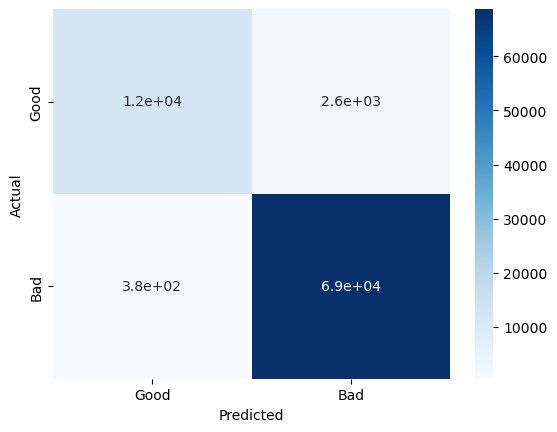

In [33]:
confusionMatrix = metrics.confusion_matrix(y_test, y_pred) # create cm
sns.heatmap(confusionMatrix, cmap="Blues", annot=True) # Display heatmap of cm
plt.xticks(np.arange(2)+0.5, ["Good", "Bad"]) # label
plt.yticks(np.arange(2)+0.5, ["Good", "Bad"])
plt.xlabel("Predicted") # label
plt.ylabel("Actual")
plt.show() # remove text

In [5]:
svm_model = SVC(kernel="linear") # specify linear as kernel
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Support Vector Machine: Accuracy")
print(classification_report(y_test, y_pred))

Support Vector Machine: Accuracy
              precision    recall  f1-score   support

         bad       0.98      0.89      0.94     14964
        good       0.98      1.00      0.99     69129

    accuracy                           0.98     84093
   macro avg       0.98      0.95      0.96     84093
weighted avg       0.98      0.98      0.98     84093



In [7]:
rf_model = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=42)	
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)
print("Random Forest: Accuracy")
print(classification_report(y_test, y_pred))

Random Forest: Accuracy
              precision    recall  f1-score   support

         bad       1.00      0.00      0.00     14964
        good       0.82      1.00      0.90     69129

    accuracy                           0.82     84093
   macro avg       0.91      0.50      0.45     84093
weighted avg       0.85      0.82      0.74     84093



In [6]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("Decision Tree: Accuracy")
print(classification_report(y_test, y_pred))

Decision Tree: Accuracy
              precision    recall  f1-score   support

         bad       0.94      0.89      0.91     14964
        good       0.98      0.99      0.98     69129

    accuracy                           0.97     84093
   macro avg       0.96      0.94      0.95     84093
weighted avg       0.97      0.97      0.97     84093



In [12]:
nb_model = BernoulliNB() # Nernoillin better for binary problems
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print("Naive Bayes: Accuracy")
print(classification_report(y_test, y_pred))

Naive Bayes: Accuracy
              precision    recall  f1-score   support

         bad       0.98      0.76      0.85     14964
        good       0.95      1.00      0.97     69129

    accuracy                           0.95     84093
   macro avg       0.96      0.88      0.91     84093
weighted avg       0.95      0.95      0.95     84093

